In [1]:
#정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import font_manager, rc
import numpy as np
import csv
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import  LinearSVC

In [2]:
# 한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# csv 파일 읽어와서 데이터프레임에 저장
df_source = pd.read_csv('NHIS_OPEN_GJ_2017_3.csv', encoding='cp949')
df_source = df_source.drop_duplicates() # 중복값 제거
df_source = df_source.dropna() # 결측값 제거
df_source

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199772,199772,199996,1,45,170,100,107.0,135.0,88.0,112.0,247.0,3.0,1.0
199773,199773,199997,2,30,155,45,63.0,107.0,61.0,83.0,151.0,1.0,1.0
199774,199774,199998,1,55,160,70,91.0,100.0,76.0,100.0,222.0,1.0,0.0
199775,199775,199999,1,40,170,75,88.2,147.0,89.0,81.0,125.0,3.0,1.0


In [4]:
x = df_source.drop(['성별', '번호', 'Unnamed: 0'], axis=1) # 성별특성을 제외한 모든 특성의 데이터
y = df_source['성별']

In [5]:
# 훈련, 테스트 셋 분리
# test_size=0.3으로 설정하여 훈련:테스트 비율을 7:3으로
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# C를 1로 설정
svc = LinearSVC(C=1, max_iter=10) # xgboost 모델 생성
svc = svc.fit(x_train, y_train)

# 테스트 셋 정확도 
accuracy = float(svc.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
accuracy = float(svc.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.6919
훈련 셋 정확도: 0.6913


c:\users\hwan\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
# 테스트, 훈련 셋 에서 68%의 정확도가 나타난다

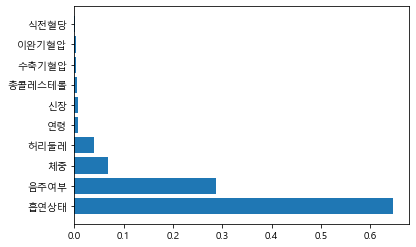

In [8]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = ['연령', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '총콜레스테롤', '흡연상태', '음주여부']
f_importances(abs(svc.coef_[0]), features_names, top=10)

In [9]:
# 흡연상태, 음주여부, 체중 순으로 확률값이 높게 나타난다

In [10]:
del svc

In [11]:
# 이번에는 C를 100으로 설정하여 과대적합과 성능을 늘려보자

In [12]:
# C를 100로 설정
svc = LinearSVC(C=100, max_iter=10) # xgboost 모델 생성
svc = svc.fit(x_train, y_train)

# 테스트 셋 정확도 
accuracy = float(svc.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
accuracy = float(svc.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.8334
훈련 셋 정확도: 0.8328


c:\users\hwan\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
# 예측률이 83% 로 이전보다 증가하였다

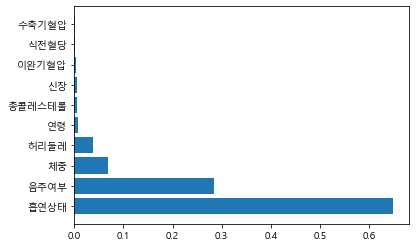

In [14]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = ['연령', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '총콜레스테롤', '흡연상태', '음주여부']
f_importances(abs(svc.coef_[0]), features_names, top=10)

In [15]:
# 요소 확률값이 큰값들의 순위는 거의 변화가없다

In [16]:
del svc

In [18]:
# C를 100로 설정, 최대반복수 200으로 설정
svc = LinearSVC(C=100, max_iter=200) # xgboost 모델 생성
svc = svc.fit(x_train, y_train)

# 테스트 셋 정확도 
accuracy = float(svc.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
accuracy = float(svc.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.7414
훈련 셋 정확도: 0.7383


c:\users\hwan\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
# 최대 반복수를 증가시킨 결과 예측율이 오히려 감소하였다

In [20]:
del svc

In [21]:
# 이번에는 최대반복수를 300으로 크게 설정하고 C를 1로 감소기켜 과대적합을 줄여보자

In [22]:
# C를 1로 설정, 최대반복수 300으로 설정
svc = LinearSVC(C=1, max_iter=300) # xgboost 모델 생성
svc = svc.fit(x_train, y_train)

# 테스트 셋 정확도 
accuracy = float(svc.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
accuracy = float(svc.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.8820
훈련 셋 정확도: 0.8807


c:\users\hwan\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
# C를 감소시키고 반복수를 늘린결과 예측율이 88%로 이전에 비해 많이 증가하였다

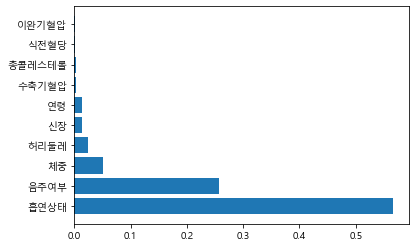

In [24]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = ['연령', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '총콜레스테롤', '흡연상태', '음주여부']
f_importances(abs(svc.coef_[0]), features_names, top=10)